[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.94200597 12.77095331  2.71064636  8.34441825  8.37618249 12.77095331
 19.61196204  6.33235686  3.91788319 12.80271756 15.18542698  5.92994458
 13.97819015 10.75889192 14.7830147   8.37618249  6.73476914 10.79065616
 15.99025154  5.15688427 14.38060243 15.99025154 15.58783926  4.35205971
  3.91788319 20.01437432 10.75889192  9.55165509 17.59990065 10.35647964
  7.5395937   7.94200597 15.58783926 12.77095331  6.33235686  3.94964743
 -0.91106415 15.21719123 12.80271756  6.73476914  5.12512003  9.55165509
 14.38060243  8.34441825 16.42442806  9.95406737 11.1613042  14.38060243
 11.96612876 16.7950761  13.60754211 15.18542698 10.35647964  8.34441825
  4.32029547 11.56371648 10.75889192  2.71064636 15.9

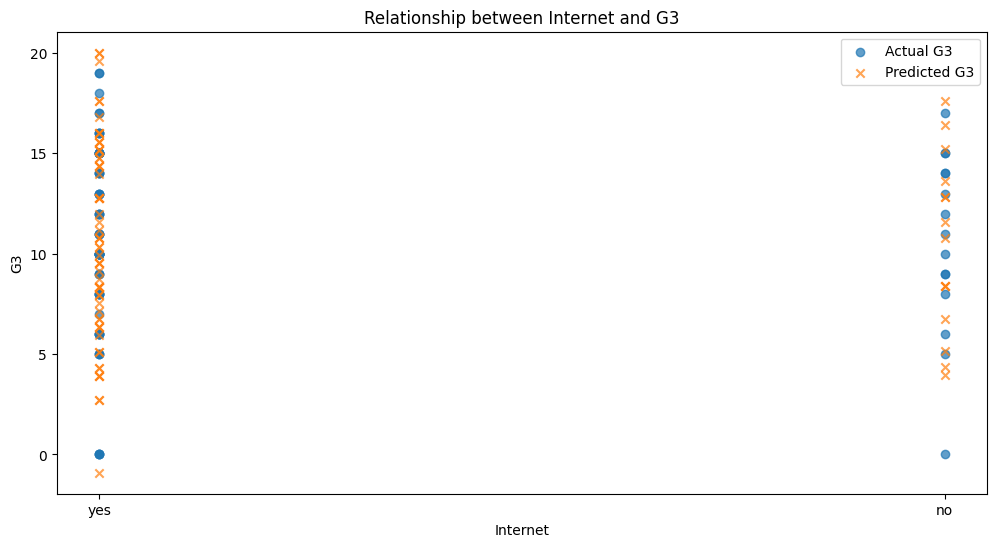

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['internet', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'internet'
data = pd.get_dummies(data, columns=['internet'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'internet_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'internet' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Internet': df.loc[X_test.index, 'internet'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'internet' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Internet'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Internet'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Internet')
plt.ylabel('G3')
plt.title('Relationship between Internet and G3')
plt.legend()
plt.show()
